# Libraries and Utils

In [592]:
import random
import re
import utils
import json
import matplotlib.pyplot as plt
import numpy as np


def check_tasks(tasks):
  prompt = ''
  for idx, task_dict in enumerate(tasks):
    if 'instances' in task_dict:
      (instruction, input, output) = task_dict["instruction"], task_dict["instances"][0]["input"], task_dict["instances"][0]["output"]
    else:
      (instruction, input, output) = task_dict["instruction"], task_dict["input"], task_dict["output"]
    instruction = re.sub(r"\s+", " ", instruction).strip().rstrip(":")
    
    input = "<noinput>" if input.lower() == "" else input
    prompt += f"###\n"
    prompt += f"{idx + 1}. Instruction: {instruction}\n"
    prompt += f"{idx + 1}. Input:\n{input}\n"
    prompt += f"{idx + 1}. Output:\n{output}\n"
  print(prompt)


def get_tasks_outputs(tasks):
  return [
    task_dict["instances"][0]["output"] if 'instances' in task_dict else task_dict["output"] 
    for task_dict in tasks
  ]

def format_ouput(output):
    lines = output.split('\n')
    result = {}

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line.startswith('-'):
            key = line
            result[key] = []
            i += 1
            while i < len(lines) and lines[i].startswith('  -'):
                result[key].append(lines[i])
                i += 1
        else:
            i += 1

    formatted_result = {}
    for key, values in result.items():
        formatted_result[key] = values

    return formatted_result
    
def check_tasks_outputs(tasks):
    tasks_outputs = get_tasks_outputs(tasks)

    for idx, output in enumerate(tasks_outputs):
        formatted_output = format_ouput(output)
        factors = list(formatted_output.keys())
        factors = [s.split('(')[0].strip('- ') for s in factors]
        
        if factors != ['Readability', 'Uniformity', 'Understandability', 'Correctness', 'Performance', 'Security']:
            print(f'Output #{idx+1}')
            print('avg_similarity_score\t>> ', tasks[idx]["avg_similarity_score"]) # I use this for unique ID
            print('factors\t\t\t>> ', factors)
            print()
            
def filter_tasks(task):
  output = task['output']
  formatted_output = format_ouput(output)
  factors = list(formatted_output.keys())
  factors = [s.split('(')[0].strip('- ') for s in factors]
  
  return factors == ['Readability', 'Uniformity', 'Understandability', 'Correctness', 'Performance', 'Security']

# Seed Tasks

In [660]:
seed_tasks = utils.jload('seed_tasks.json')
seed_tasks = [{
  'instruction': task['instruction'],
  'input': task['instances'][0]['input'],
  'output': task['instances'][0]['output'],
} for task in seed_tasks]
seed_tasks
check_tasks(random.sample(seed_tasks, 3))

###
1. Instruction: Perform a code review on the provided HTML/CSS code file to improve the following factors: Readability, Uniformity, Understandability, Correctness, Performance, and Security.
1. Input:
```
<!DOCTYPE html>
<html>
<head>
    <title>Code Review Example</title>
    <style>
        body{background-color:#f0f0f0;}
        h1{font-size:24px;color:#333;font-family:Arial;}
        p{font-size:16px;color:#666;font-family:Arial;}
        .container{width:960px;margin:0 auto;}
        .header{background-color:#333;color:#fff;padding:20px;}
        .content{background-color:#fff;padding:20px;}
        .footer{background-color:#333;color:#fff;padding:20px;}
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>Code Review Example</h1>
        </div>
        <div class="content">
            <h1>Welcome to my website</h1>
            <p>This is an example of a code review.</p>
        </div>
        <div class="footer">
            <p

In [663]:
seed_task_df = pd.DataFrame(seed_tasks)
seed_task_df['positive_count'] = seed_task_df['output'].apply(lambda row: row.count('POSITIVE'))
seed_task_df

,instruction,input,output,positive_count
0,Perform a code review on the given Python code...,"```\ndef Add_numbers(a,b):\n Sum=a+b\n r...",- Readability (Status: NEGATIVE)\n - Function...,3
1,Perform a code review on the given Python code...,```\ndef calculate_area(radius):\n import m...,- Readability (Status: NEGATIVE)\n - Avoid us...,5
2,Perform a code review on the given Python code...,```\nimport requests\ndef get_data(url):\n ...,- Readability (Status: NEGATIVE)\n - Rename v...,5
3,Perform a code review on the provided JavaScri...,```\n// Variables\nconst MAX_VALUE = 100;\ncon...,- Readability (Status: POSITIVE)\n - Variable...,5
4,Perform a code review on the provided JavaScri...,"```\nfunction A(f){\n const B = [1,2,3];\n ...",- Readability (Status: NEGATIVE)\n - The code...,2
5,Perform a code review on the provided JavaScri...,```\nfunction calculateSum() {\nlet a = 5; le...,- Readability (Status: NEGATIVE)\n - Inconsis...,4
6,Perform a code review on the given HTML/CSS co...,```\n<!DOCTYPE html>\n<html>\n<head>\n <tit...,- Readability (Status: NEGATIVE)\n - Consider...,5
7,Perform a code review on the provided HTML/CSS...,```\n<!DOCTYPE html>\n<html>\n<head>\n <tit...,- Readability (Status: NEGATIVE)\n - The lack...,5
8,Perform a code review on the provided HTML/CSS...,```\n<!DOCTYPE html>\n<html>\n<head>\n<title>M...,- Readability (Status: POSITIVE)\n - The code...,6


array([0, 1, 2, 3, 4, 5])

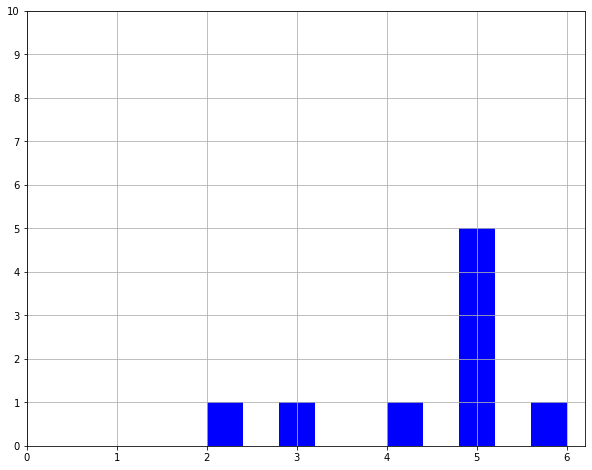

In [679]:
plt.figure(figsize=(10, 8)) 
plt.hist(seed_task_df['positive_count'].values.flatten(), color='blue')
plt.xticks(np.arange(0, 6+1, 1))
plt.yticks(np.arange(0, 10+1, 1))
plt.grid(True)
plt.show()

# Generated Tasks

In [594]:
regen_tasks_path = 'regen.json'
regen_tasks = utils.jload(regen_tasks_path)
print(f'Generated Tasks Length: {len(regen_tasks)}')

Generated Tasks Length: 1000


## Check Tasks Output

In [595]:
print('len(regen_tasks) >>', len(regen_tasks))
check_tasks_outputs(regen_tasks)

len(regen_tasks) >> 1000


## Filter Tasks

In [596]:
filtered_regen_tasks = list(filter(filter_tasks, regen_tasks))

print('len(filtered_regen_tasks) >>', len(filtered_regen_tasks))
check_tasks_outputs(filtered_regen_tasks)

len(filtered_regen_tasks) >> 1000


In [597]:
with open(regen_tasks_path, 'w') as file:
    json.dump(filtered_regen_tasks, file)

print(f'{regen_tasks_path} filtered sucessfully.')

regen.json filtered sucessfully.


## Preprocess Tasks for Final Dataset

In [598]:
regen_tasks_ = [{k: v for k, v in d.items() if k not in {'most_similar_instructions', 'avg_similarity_score'}} for d in regen_tasks]
print(json.dumps(regen_tasks_[:3], indent=2))

[
  {
    "instruction": "Perform a code review on the provided Python script and provide feedback on the readability, uniformity, understandability, correctness, performance, and security aspects of the code.",
    "input": "```\n# Python script to check if a number is prime or not\n\ndef is_prime(number):\n    if number < 2:\n        return False\n    for i in range(2, number):\n        if number % i == 0:\n            return False\n    return True\n\nnum = 17\n\nif is_prime(num):\n    print(f\"{num} is a prime number.\")\nelse:\n    print(f\"{num} is not a prime number.\")\n```",
    "output": "- Readability (Status: POSITIVE)\n  - The code is well-structured and easy to read.\n  - The use of comments helps in understanding the purpose of the different sections of code.\n- Uniformity (Status: POSITIVE)\n  - The code follows consistent indentation and spacing conventions, improving uniformity.\n- Understandability (Status: POSITIVE)\n  - The code is simple and straightforward to unde

## Determine Minimum Dataset Size

In [599]:
import pandas as pd
regen_task_df = pd.DataFrame(regen_tasks_)
regen_task_df.head(3)

,instruction,input,output
0,Perform a code review on the provided Python s...,```\n# Python script to check if a number is p...,- Readability (Status: POSITIVE)\n - The code...
1,Conduct a code review on the provided JavaScri...,```javascript\n// JavaScript function to calcu...,- Readability (Status: POSITIVE)\n - The code...
2,Review the given C++ code and provide feedback...,```cpp\n// C++ program to reverse an array\n#i...,- Readability (Status: POSITIVE)\n - The code...


In [600]:
import math


word_count_df = regen_task_df.applymap(lambda x: len(str(x).split()))
total_words = word_count_df.sum().sum()
print('Total words:', total_words)
print('Total data:', len(regen_task_df))
words_per_data = math.floor(total_words / len(regen_task_df))
print('Words/data:', words_per_data)

print()
min_total_words = 100_000
print('Min. total words:', min_total_words)
print()

total_data_needed = math.floor((min_total_words-total_words) / words_per_data)
total_data_needed
print(f'Total data needed: {total_data_needed}')

Total words: 206524
Total data: 1000
Words/data: 206

Min. total words: 100000

Total data needed: -518


In [625]:
inst, input, output = list(regen_task_df.iloc[word_count_df.sum(axis=1).idxmax()])[:3]
prompt = f'''Below is an instruction that describes a code review, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{inst}

### Input:
{input}

### Response:
{output} 
'''
print(prompt)

Below is an instruction that describes a code review, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Perform a code review on the provided Python code file. Identify any issues related to readability, uniformity, understandability, correctness, performance, and security.

### Input:
```python
def calculate_sum(numbers):
    """
    Calculate the sum of a list of numbers.
    """
    sum = 0
    for number in numbers:
        sum += number
    return sum

def is_prime(number):
    """
    Check if a number is prime.
    """
    if number <= 1:
        return False
    for i in range(2, number):
        if number % i == 0:
            return False
    return True

def factorial(n):
    """
    Calculate the factorial of a number.
    """
    if n == 0:
        return 1
    else:
        result = 1
        for i in range(1, n + 1):
            result *= i
        return result

def encrypt(text, shift):
    

## Analyze Dataset

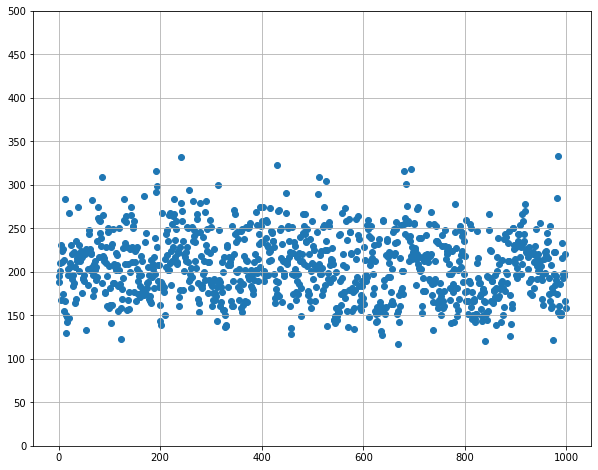

In [602]:
plt.figure(figsize=(10, 8))
plt.scatter(word_count_df.index, word_count_df.sum(axis=1))
plt.grid(True)
plt.yticks(np.arange(0, 500+50, 50))
plt.show()

In [603]:
regen_task_df['positive_count'] = regen_task_df['output'].apply(lambda row: row.count('POSITIVE'))
regen_task_df.head()

,instruction,input,output,positive_count
0,Perform a code review on the provided Python s...,```\n# Python script to check if a number is p...,- Readability (Status: POSITIVE)\n - The code...,5
1,Conduct a code review on the provided JavaScri...,```javascript\n// JavaScript function to calcu...,- Readability (Status: POSITIVE)\n - The code...,6
2,Review the given C++ code and provide feedback...,```cpp\n// C++ program to reverse an array\n#i...,- Readability (Status: POSITIVE)\n - The code...,6
3,Review the given PHP code and provide feedback...,```php\n<?php\n\n// PHP script to check if a s...,- Readability (Status: POSITIVE)\n - The code...,6
4,Conduct a code review on the given TypeScript ...,```typescript\n// TypeScript class to represen...,- Readability (Status: POSITIVE)\n - The code...,6


In [604]:
regen_task_df[['positive_count']].value_counts()

positive_count
6                 880
5                  81
4                  23
3                  16
dtype: int64

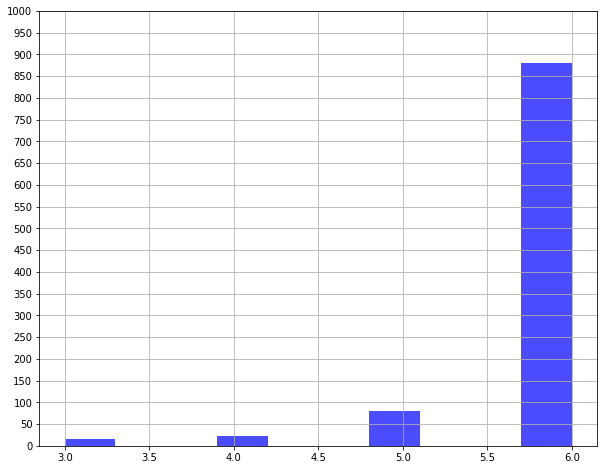

In [605]:
plt.figure(figsize=(10, 8)) 
plt.hist(regen_task_df['positive_count'].values.flatten(), bins=10, alpha=0.7, color='blue')
plt.yticks(np.arange(0, 1000+50, 50))
plt.grid(True)
plt.show()

In [606]:
reduced_6_positive_count_data = regen_task_df[regen_task_df['positive_count'] == 6].sample(81)
regen_task_df2 = regen_task_df.drop(regen_task_df[regen_task_df['positive_count'] == 6].index)
regen_task_df2 = regen_task_df2.append(reduced_6_positive_count_data, ignore_index=True)
len(regen_task_df2)

201

In [607]:
regen_task_df2.head()

,instruction,input,output,positive_count
0,Perform a code review on the provided Python s...,```\n# Python script to check if a number is p...,- Readability (Status: POSITIVE)\n - The code...,5
1,Conduct a code review on the provided PHP code...,```php\n<?php\n\nfunction calculateArea($radiu...,- Readability (Status: NEGATIVE)\n - Inconsis...,3
2,Perform a code review on the provided PHP code...,"```\n<?php\n\nfunction multiply_numbers($a, $b...",- Readability (Status: NEGATIVE)\n - Inconsis...,3
3,Perform a code review on the provided PHP code...,```php\n<?php\n\nclass Calculator {\n priva...,- Readability (Status: POSITIVE)\n - Code is ...,5
4,Perform a code review on the provided Ruby cod...,```ruby\nclass Calculator\n attr_reader :to...,- Readability (Status: POSITIVE)\n - Code is ...,5


In [608]:
# regen_task_df2[['instruction', 'input', 'output']].to_json('coderev_data_200.json', orient='records', lines=True)

## Export Dataset

In [609]:
# with open('coderev_data.json', 'w') as f:
#     json.dump(regen_tasks_, f)